# 초기 당뇨병 위험 예측 데이터셋
 - Diabetes Dataset : 2020년 520명의 15개 속성과 1개의 클래스를 나타냄 
 - 속성(feature)는 15개
   - Gender: 성별/1은 남자, 2는 여자
   - Polyuria : 다뇨증/ 1은 예, 0은 아니오
   - Polydipsia : 조갈증
   - sudden weight loss : 갑작스러운 체중 감소
   - weakness : 기저질환
   - Polyphagia : 다식증
   - Genital thrush : 생식기 염증
   - visual blurring : 시각적 흐릿함
   - Itching : 가려움
   - Irritability : 과민성
   - delayed healing : 지연된 치유
   - partial paresis : 부분 마비
   - muscle stiffness : 근육 긴장도
   - Alopecia : 탈모
   - Obesity : 비만
 - 클래스(class)는 1개
   - 1은 당뇨 양성, 0은 당뇨 음성

 - 참고자료(UCI저장소)
   - https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

# 로지스틱 회귀(logistic regression)
 - 로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#1. 데이터셋 불러오기(ThoraricSurgery.csv)

url = 'https://drive.google.com/uc?export=download&id=1zs-H7slk3aAkGNsg7TFxK2sS7OjHxeku'
df = pd.read_csv(url)
print(df.shape)
#위에 5개 데이터만 출력하기
df.head()

(520, 16)


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
#2. 데이터 및 레이블 분리하기
lim = int(len(df) * 0.7)
train_x = df.iloc[:lim, 0:15].to_numpy()
test_x = df.iloc[lim:, 0:15].to_numpy()
train_y = df.iloc[:lim, 15].to_numpy()
test_y = df.iloc[lim:, 15].to_numpy()


train_x.shape, train_y.shape, test_x.shape, test_y.shape

((364, 15), (364,), (156, 15), (156,))

In [4]:
#3. 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim = 15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
              #loss='mse'
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 4.모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.25)

Epoch 1/100
28/28 [==============================] - 0s 10ms/step - loss: 0.7000 - accuracy: 0.5165 - val_loss: 0.6572 - val_accuracy: 0.5055
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8278 - val_loss: 0.7725 - val_accuracy: 0.3077
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8205 - val_loss: 0.8712 - val_accuracy: 0.2857
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8168 - val_loss: 0.9061 - val_accuracy: 0.2857
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8168 - val_loss: 0.8840 - val_accuracy: 0.2857
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8168 - val_loss: 0.8713 - val_accuracy: 0.2857
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.8278 - val_loss: 0.8349 - val_accuracy: 0.3297
Epoch 8/100


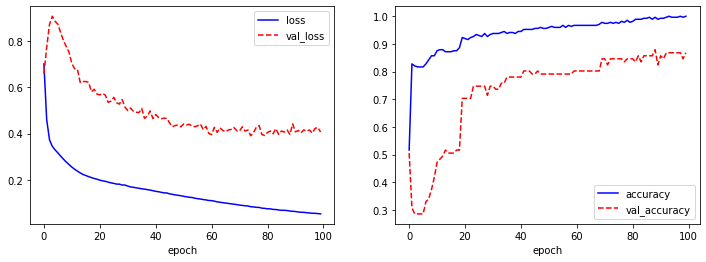

In [6]:
# 5.검증 그래프 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-', label='accuracy')
plt.plot(history.history['val_accuracy'],'r--',label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [7]:
# 6. 모델 검증 평가
model.evaluate(test_x, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9231


[0.23613755404949188, 0.9230769276618958]

# 다항 분류 - MNIST

In [8]:
# 1. MNIST 데이터 불러오기
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()



train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

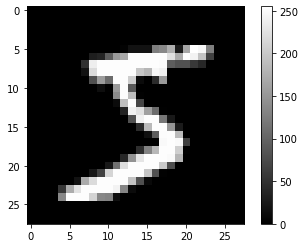

5

In [9]:
# 2. 데이터 확인(이미지)
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap = 'gray')
plt.colorbar()
plt.show()

train_Y[0]

In [10]:
# 3. 데이터 정규화 (픽셀의 값을 255 -> 0~1사이로)
train_X = train_X / 255.0
train_Y = train_Y / 255.0

train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
# 4. 레이블 - 원핫인코딩
print(train_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)


train_Y[0]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# 5. 모델 구성
Model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
]) 
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6. 모델 학습
history = model.fit(train_X, train_Y, epochs = 10, validation_split=0.25)

In [ ]:
# 7. 모델 검증
model.evaluate(test_X, test_Y)

In [ ]:
# 8. 모델 예측
predict = 